<a href="https://colab.research.google.com/github/summerolmstead/Animal-Classification-Tree/blob/main/Zoo_Classification_Tree_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Summer Olmstead

Data Visualization | Tree Visualization

Zoo Classification Dataset by UC Irvine https://archive.ics.uci.edu/dataset/111/zoo

# Importing code from UC Irvine website

In [63]:
pip install ucimlrepo

In [66]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
zoo = fetch_ucirepo(id=111)

# data (as pandas dataframes)
X = zoo.data.features
y = zoo.data.targets

# metadata
print(zoo.metadata)

# variable information
print(zoo.variables)


{'uci_id': 111, 'name': 'Zoo', 'repository_url': 'https://archive.ics.uci.edu/dataset/111/zoo', 'data_url': 'https://archive.ics.uci.edu/static/public/111/data.csv', 'abstract': 'Artificial, 7 classes of animals', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 101, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['type'], 'index_col': ['animal_name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Sep 15 2023', 'dataset_doi': '10.24432/C5R59V', 'creators': ['Richard Forsyth'], 'intro_paper': None, 'additional_info': {'summary': 'A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)', 'purpose': None, 'funded_by': None, 'inst

In [99]:
#load your dataset
url = 'https://archive.ics.uci.edu/static/public/111/data.csv'
zoo_df = pd.read_csv(url)

print(zoo_df.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  


# Decision Tree - Statistical Method

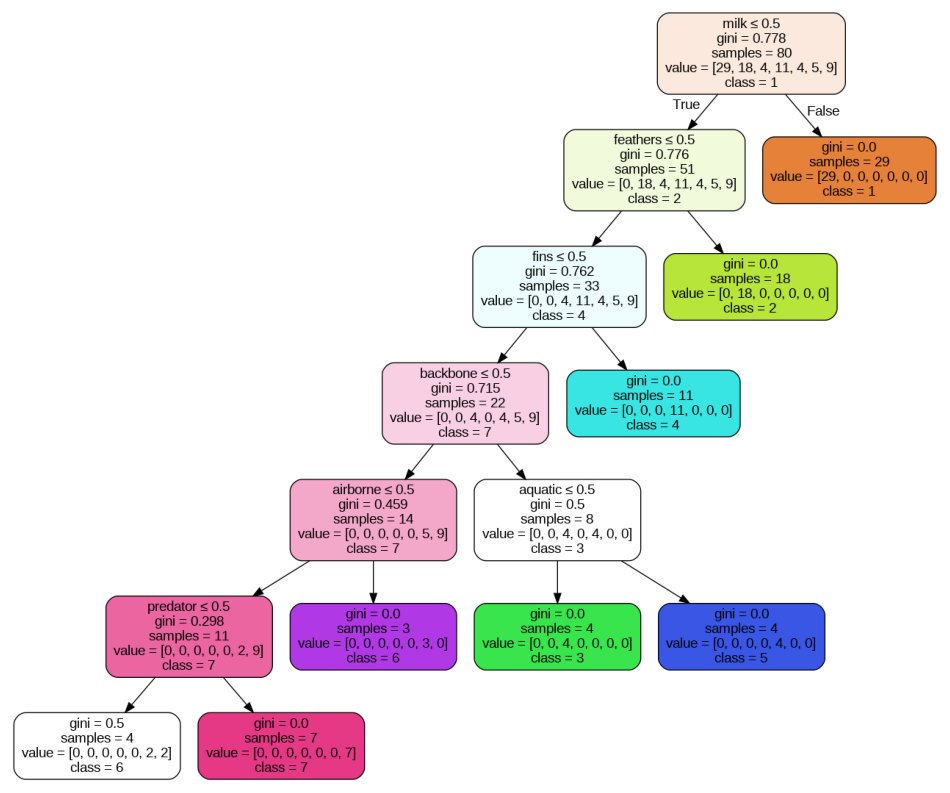

Decision Tree Performance:
Training Accuracy: 97.50%
Testing Accuracy: 95.24%

Feature Importance Ranking:
milk: 0.3759
feathers: 0.2395
fins: 0.1565
backbone: 0.0880
aquatic: 0.0664
airborne: 0.0524
predator: 0.0211
hair: 0.0000
eggs: 0.0000
toothed: 0.0000
breathes: 0.0000
venomous: 0.0000
legs: 0.0000
tail: 0.0000
domestic: 0.0000
catsize: 0.0000


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import pydot
from PIL import Image
import io


#features and target from dataset loaded in!
features = zoo_df.columns[:-1]
X = zoo_df[features].drop('animal_name', axis=1)
y = zoo_df['type']

#split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the decision tree and fit
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

#export_graphviz function to generate a Graphviz DOT file for graph
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=[str(i) for i in np.unique(y)],
                           filled=True, rounded=True, special_characters=True)

#pydot graph from the DOT data for visual
graph = pydot.graph_from_dot_data(dot_data)[0]

#converting the graph to PNG format to display it
png_data = graph.create_png()

#PIL to open the PNG data
image = Image.open(io.BytesIO(png_data))

#displaying the image!
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')
plt.show()

#performance and feature importance
print("Decision Tree Performance:")
print(f"Training Accuracy: {dt.score(X_train, y_train):.2%}")
print(f"Testing Accuracy: {dt.score(X_test, y_test):.2%}")
print("\nFeature Importance Ranking:")
for feature, importance in sorted(zip(X.columns, dt.feature_importances_), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

#notice how the feature importance is only not 0 if it is included as a decision feature. also we have a high accuracy of training 97% and testing 95%!

# Decision Classification Tree - Simple Reading Version

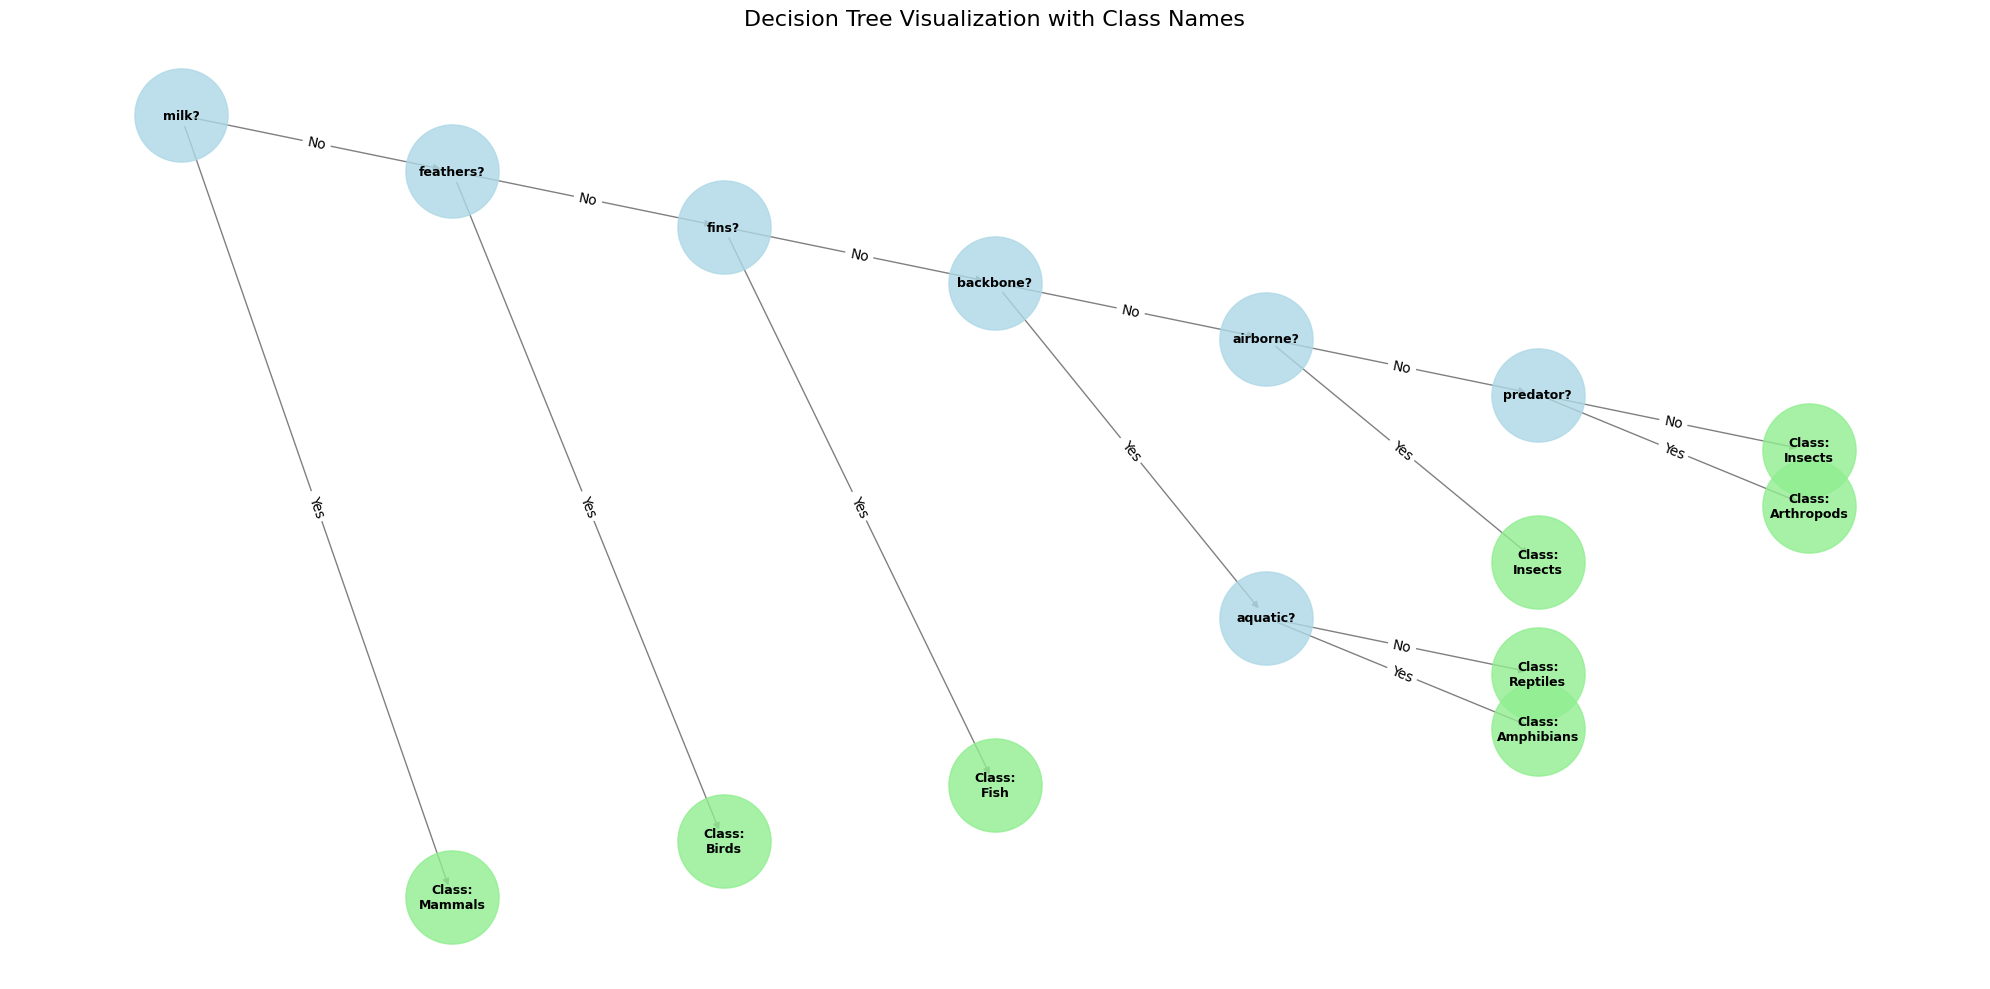

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import networkx as nx

#line for plots to show in Colab
plt.rcParams['figure.figsize'] = (20, 10)

#another method to showcase the tree but in a more readable format
# Load the dataset
#url = 'https://archive.ics.uci.edu/static/public/111/data.csv'
#zoo_df = pd.read_csv(url)

#features and target
features = zoo_df.columns[:-1]
X = zoo_df[features].drop('animal_name', axis=1)  # Drop 'animal_name' which is non-numeric
y = zoo_df['type']

#repeating split and train process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

#class label mapping from website
class_label_mapping = {
    1: "Mammals",
    2: "Birds",
    3: "Reptiles",
    4: "Fish",
    5: "Amphibians",
    6: "Insects",
    7: "Arthropods"
}

#function for building a networkx graph from the decision tree with more readable labels
def build_tree_graph_with_class_names(tree, feature_names, class_label_mapping):
    G = nx.DiGraph() #initalize

    #recursive function to add nodes for tree
    def add_nodes(node_id, parent=None, edge_label='', level=0):
        tree_ = tree.tree_
        #node type and label
        if tree_.feature[node_id] != -2:  # not a leaf node
            feature = feature_names[tree_.feature[node_id]]  #get feature name
            node_label = f"{feature}?" #asking if has feature question here

            #add node to graph
            G.add_node(node_id, label=node_label, level=level)

            #connect to parent
            if parent is not None:
                G.add_edge(parent, node_id, label=edge_label)

            #recursively add left and right children !
            left_child = tree_.children_left[node_id]
            right_child = tree_.children_right[node_id]

            add_nodes(left_child, node_id, 'No', level+1) #this is if answer is no to feature
            add_nodes(right_child, node_id, 'Yes', level+1) #if answer is yes to feature
        else:
            #leaf node need to get classification answer
            class_index = np.argmax(tree_.value[node_id][0])  #get index of the most frequent class from mapping we did
            predicted_class = class_label_mapping[class_index + 1]  #adjust for 0-indexing....

            node_label = f"Class:\n{predicted_class}"

            #finally add leaf node to graph
            G.add_node(node_id, label=node_label, level=level)

            #connect to parent
            if parent is not None:
                G.add_edge(parent, node_id, label=edge_label)

    #start building from root node
    add_nodes(0)

    return G

#create the graph with class names
tree_graph = build_tree_graph_with_class_names(dt, X.columns, class_label_mapping)

#node positions (top to bottom layout so it isnt all crazy)
pos = {}
for node in tree_graph.nodes():
  pos[node] = (tree_graph.nodes[node]['level'], -node)

#plotting
plt.figure(figsize=(20, 10))
#draw nodes
internal_nodes = [n for n in tree_graph.nodes() if 'Class' not in tree_graph.nodes[n].get('label', '')]
leaf_nodes = [n for n in tree_graph.nodes() if 'Class' in tree_graph.nodes[n].get('label', '')]
#node colors 0 light green for leaf nodes for class and blue for internal quetion feature nodes
nx.draw_networkx_nodes(tree_graph, pos, nodelist=internal_nodes, node_color='lightblue', node_size=4500, alpha=0.8)
nx.draw_networkx_nodes(tree_graph, pos, nodelist=leaf_nodes, node_color='lightgreen', node_size=4500, alpha=0.8)
#draw edges
nx.draw_networkx_edges(tree_graph, pos, edge_color='gray', arrows=True)
#node labels
node_labels = nx.get_node_attributes(tree_graph, 'label')
nx.draw_networkx_labels(tree_graph, pos, labels=node_labels, font_size=9,font_weight='bold') #bolding bc easier to read
#edge labels
edge_labels = nx.get_edge_attributes(tree_graph, 'label')
nx.draw_networkx_edge_labels(tree_graph, pos, edge_labels=edge_labels)
plt.title('Decision Tree Visualization with Class Names', fontsize=16)
plt.axis('off')
plt.tight_layout()

#display
plt.show()
#has some slight overlap at end class nodes but a bit complicated to fix for now